In [11]:
import ase.io
from utils import *
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
from ase.visualize import view
import seaborn as sns  
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
sp2 = []  # number of carbon with sp2-hybr; each step
carbon_cycles = []  # number of carbon cycles with sizes 4,5,6,7; each step
cluster_num = []  # number of molecules with size greater than half of coronene; each step

In [3]:
for step in tqdm(range(0, 1000000, 10000)):
    atoms = ase.io.read('data/first_trials/coronene.%d.cfg' % step)
    sp = get_carbon_hybr(atoms)
    sp2_atoms = sp[1]
    sp2.append(sp2_atoms.shape[0])
    cycle_num = 0
    for cycle_length in range(4,8):
        cycle_num += len(get_carbon_cycles(atoms, cycle_length))
    carbon_cycles.append(cycle_num)
    cluster_num.append(get_clusters_num(atoms))

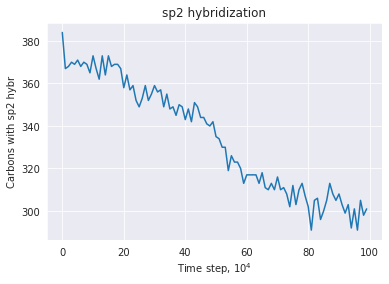

In [19]:
plt.xlabel("Time step, $10^4$")
plt.ylabel("Carbons with sp2 hybr")
plt.title("sp2 hybridization")
plt.plot(sp2)

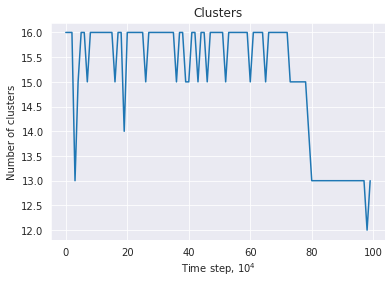

In [20]:
plt.xlabel("Time step, $10^4$")
plt.ylabel("Number of clusters")
plt.title("Clusters")
plt.plot(cluster_num)

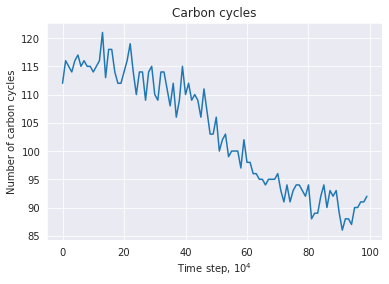

In [21]:
plt.xlabel("Time step, $10^4$")
plt.ylabel("Number of carbon cycles")
plt.title("Carbon cycles")
plt.plot(carbon_cycles)

In [15]:
atoms0 = ase.io.read("data/first_trials/coronene.0.cfg")
atoms500k = ase.io.read("data/first_trials/coronene.500000.cfg")
atoms1m = ase.io.read("data/first_trials/coronene.990000.cfg")

In [16]:
view(atoms0, viewer='ngl')

In [17]:
view(atoms500k, viewer='ngl')

In [18]:
view(atoms1m, viewer='ngl')